In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re

In [72]:
trainpath = './data/train'
train_master = pd.read_csv(os.path.join(trainpath, 'Master_Training_Set.csv'), encoding='gbk')
train_userupdateinfo = pd.read_csv(os.path.join(trainpath, 'Userupdate_Info_Training_Set.csv'), encoding='gbk')
train_loginfo = pd.read_csv(os.path.join(trainpath, 'LogInfo_Training_Set.csv'), encoding='gbk')
train_master['source'] = 'train'
train_userupdateinfo['source'] = 'train'
train_loginfo['source'] = 'train'

testpath ='./data/test'
test_master = pd.read_csv(os.path.join(testpath, 'Master_Test_Set.csv'), encoding='gbk')
test_userupdateinfo = pd.read_csv(os.path.join(testpath, 'Userupdate_Info_Test_Set.csv'), encoding='gbk')
test_loginfo = pd.read_csv(os.path.join(testpath, 'LogInfo_Test_Set.csv'), encoding='gbk')
test_master['source'] = 'test'
test_userupdateinfo['source'] = 'test'
test_loginfo['source'] = 'test'

In [73]:
master =pd.concat([train_master, test_master], ignore_index=True)
userupdateinfo = pd.concat([train_userupdateinfo,test_userupdateinfo], ignore_index=True)
loginfo =pd.concat([train_loginfo,test_loginfo],ignore_index=True)



In [74]:
myfont = FontProperties(fname=r"./SIMHEI.TTF",size=12)
master.drop(['WeblogInfo_1' ,'WeblogInfo_3'],axis=1,inplace=True)
master.loc[(master.UserInfo_12.isnull() , 'UserInfo_12')] = 2.0
master.loc[(master.UserInfo_11.isnull() , 'UserInfo_11')] = 2.0
master.loc[(master.UserInfo_13.isnull() , 'UserInfo_13')] = 2.0
master.loc[(master.WeblogInfo_20.isnull() , 'WeblogInfo_20')] = u'不详'
master.loc[(master.WeblogInfo_19.isnull() , 'WeblogInfo_19')] = u'不详'
master.loc[(master.WeblogInfo_21.isnull() , 'WeblogInfo_21')] = '0'

In [75]:
 ## 用众数填充缺失值
categoric_cols = ['UserInfo_1' ,'UserInfo_2' ,'UserInfo_3' ,'UserInfo_4' , 'UserInfo_5' ,'UserInfo_6','UserInfo_7','UserInfo_8','UserInfo_9','UserInfo_11','UserInfo_12','UserInfo_13','UserInfo_14','UserInfo_15','UserInfo_16','UserInfo_17','UserInfo_19','UserInfo_20','UserInfo_21','UserInfo_22','UserInfo_23','UserInfo_24','Education_Info1','Education_Info2','Education_Info3','Education_Info4','Education_Info5','Education_Info6','Education_Info7','Education_Info8','WeblogInfo_19','WeblogInfo_20','WeblogInfo_21','SocialNetwork_1','SocialNetwork_2','SocialNetwork_7','SocialNetwork_12']
# for col in categoric_cols:
#     mode_cols = master[col].mode()[0]
#     master.loc[(master[col].isnull() , col)] = mode_cols 

## 用均值填充缺失值 
numeric_cols = []
for col in master.columns:
    if col not in categoric_cols and col !=u'Idx' and col !=u'target'and col !='source' and col !='ListingInfo':
        mean_cols = master[col].mean()
        master.loc[(master[col].isnull() , col)] = mean_cols


In [76]:
# 去掉空格
master['UserInfo_9'] = master['UserInfo_9'].apply(lambda x: x.strip())
## 去掉大小写
userupdateinfo['UserupdateInfo1'] =userupdateinfo['UserupdateInfo1'].apply(lambda x:x.lower())
## 将UserInfo_8中城市名归一化
def encodingstr(s):
    regex = re.compile(r'.+市')
    if regex.search(s):
        s = s[:-1]
        return s
    else:
        return s
master['UserInfo_8'] =master['UserInfo_8'].apply(lambda x: encodingstr(x))
userupdateinfo.to_csv('./userupdateinfo.csv',index=False,encoding='utf-8')

In [77]:
## 借款日期离散化
# 把月、日、单独拎出来，放到3列中
master['month'] = pd.DatetimeIndex(master.ListingInfo).month
master['day']  = pd.DatetimeIndex(master.ListingInfo).day
master['day'].head()
master.drop(['ListingInfo'],axis=1,inplace=True)
master['target'] = master['target'].astype(str)
master.to_csv('./master.csv',index=False,encoding='utf-8')

In [78]:
from collections import defaultdict
import datetime as dt

##  userupdateinfo表
userupdate_info_number = defaultdict(list)  ### 用户信息更新的次数
userupdate_info_category = defaultdict(set)  ###用户信息更新的种类数
userupdate_info_times = defaultdict(list)  ### 用户分几次更新了
userupdate_info_date = defaultdict(list)  #### 用户借款成交与信息更新时间跨度
with open('./userupdateinfo.csv', 'r') as f:
    f.readline()
    for line in f.readlines():
        cols = line.strip().split(",")  ### cols 是list结果
        userupdate_info_date[cols[0]].append(cols[1])
        userupdate_info_number[cols[0]].append(cols[2])
        userupdate_info_category[cols[0]].add(cols[2])
        userupdate_info_times[cols[0]].append(cols[3])
    print(u'提取信息完成')




提取信息完成


In [79]:
userupdate_info_number_ = defaultdict(int)  ### 用户信息更新的次数
userupdate_info_category_ = defaultdict(int)  ### 用户信息更新的种类数
userupdate_info_times_ = defaultdict(int)  ### 用户分几次更新了
userupdate_info_date_ = defaultdict(int)  #### 用户借款成交与信息更新时间跨度
for key in userupdate_info_date.keys():
    userupdate_info_times_[key] = len(set(userupdate_info_times[key]))
    delta_date = dt.datetime.strptime(userupdate_info_date[key][0], '%Y/%m/%d') - dt.datetime.strptime(
        list(set(userupdate_info_times[key]))[0], '%Y/%m/%d')
    userupdate_info_date_[key] = abs(delta_date.days)
    userupdate_info_number_[key] = len(userupdate_info_number[key])
    userupdate_info_category_[key] = len(userupdate_info_category[key])

print('信息处理完成')


信息处理完成


In [80]:
## 建立一个DataFrame
Idx_ = list(userupdate_info_date_.keys())  #### list
numbers_ = list(userupdate_info_number_.values())
categorys_ = list(userupdate_info_category_.values())
times_ = list(userupdate_info_times_.values())
dates_ = list(userupdate_info_date_.values())
userupdate_df = pd.DataFrame(
    {'Idx': Idx_, 'numbers': numbers_, 'categorys': categorys_, 'times': times_, 'dates': dates_})
userupdate_df.head()
userupdate_df.to_csv('./userupdate_df.csv', index=False, encoding='utf-8')

In [81]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_validate, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [82]:
master = pd.read_csv('./master.csv',encoding='utf-8')
userupdateinfo = pd.read_csv('./userupdate_df.csv',encoding='utf-8')
#train_loginfo = pd.read_csv('./loginfo_df.csv',encoding='utf-8')

In [83]:
all = pd.merge(master, userupdateinfo, how='left', on='Idx')
#train_all = pd.merge(train_all, train_loginfo, how='left', on='Idx')


In [84]:
import warnings
warnings.filterwarnings("ignore")
all['target'].fillna(-1, inplace=True)
all['Idx'] = all['Idx'].astype(np.int64)
all['target'] = all['target'].astype(np.int64)
all = pd.get_dummies(all)


In [68]:
## 填充缺失值
features_to_fillna = all.columns
# 用平均值来填充
all[features_to_fillna] = all[features_to_fillna].fillna(all[features_to_fillna].mean())
## 对数值型特征进行scaling
import warnings
from sklearn.preprocessing import StandardScaler
# 创建一个标准化器
scaler = StandardScaler()
# 选择需要缩放的数值型特征列，例如选择所有数值型特征
numeric_features = all.select_dtypes(include=['number']).columns
numeric_features = [feature for feature in numeric_features if feature != 'Idx' and feature !='target']
# 对数值型特征进行缩放
all[numeric_features] = scaler.fit_transform(all[numeric_features])
warnings.filterwarnings("ignore")

In [85]:
# 拆分数据集回训练集和测试集
train_data = all[all['source_test'] == False]
test_data = all[all['source_test'] == True]
train_data.drop(['source_test','source_train'],axis=1,inplace=True)
test_data.drop(['source_test','source_train'],axis=1,inplace=True)


In [86]:
y_train=train_data['target']
test_data.drop(['target'],axis=1,inplace=True)
train_data.drop(['target'],axis=1,inplace=True)

200

关于现在这个模型
准确率 : 0.9415
AUC 得分 (训练集): 0.980443
f204    192.0
f28     192.0
f99     180.0
f205    177.0
f106    176.0
f86     176.0
f82     167.0
f71     159.0
f209    157.0
f87     156.0
f85     154.0
f133    153.0
f89     152.0
f123    149.0
f116    148.0
f97     146.0
f90     142.0
f92     141.0
f101    140.0
f69     139.0
f72     138.0
f107    138.0
f140    137.0
f102    135.0
f136    132.0
dtype: float64
(443,)


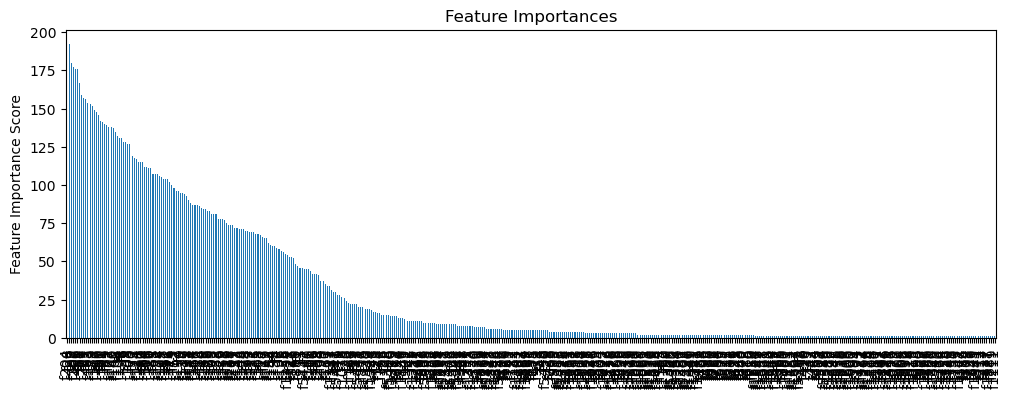

In [87]:
def modelfit(alg, dtrain, y_train, dtest=None, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values[:, 1:], label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #建模
    alg.fit(dtrain.values[:, 1:], y_train, eval_metric='auc')

    #对训练集预测
    dtrain_predictions = alg.predict(dtrain.values[:, 1:])
    dtrain_predprob = alg.predict_proba(dtrain.values[:, 1:])[:, 1]

    #输出模型的一些结果
    print(cvresult.shape[0])
    print("\n关于现在这个模型")
    print("准确率 : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC 得分 (训练集): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    print(feat_imp.head(25))
    print(feat_imp.shape)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


xgb1 = XGBClassifier(
    learning_rate=0.04,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1.0,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

modelfit(xgb1, train_data, y_train)

In [94]:
train_data.isnull().sum().sort_values(ascending=False).head(10)
features_to_fillna = train_data.columns
# 用平均值来填充
train_data[features_to_fillna] =train_data[features_to_fillna].fillna(train_data[features_to_fillna].mean())
train_data.isnull().sum().sort_values(ascending=False).head(10)

Idx                          0
UserInfo_24_江西省德安县磨溪乡五星村     0
UserInfo_24_江西省樟树市药都路        0
UserInfo_24_江西省景德镇市珠山区       0
UserInfo_24_江西省新建县长_镇        0
UserInfo_24_江西省新建县乐化镇黄墩村     0
UserInfo_24_江西省新干县七琴镇        0
UserInfo_24_江西省新余市渝水区长青北路    0
UserInfo_24_江西省抚州市宜黄县        0
UserInfo_24_江西省抚州市乐安县        0
dtype: int64

In [95]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
rf0 = RandomForestClassifier(oob_score=True, random_state=42)
rf0.fit(train_data.values[:, 1:], y_train)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(train_data.values[:, 1:])[:, 1]
print('AUC Score(Train): %f' % metrics.roc_auc_score(y_train, y_predprob))
import warnings

warnings.filterwarnings("ignore")
lr = LogisticRegression(tol=1e-6)
parameters = {'penalty': ('l1', 'l2'), 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv=3)
print('开始训练')
clf_lr.fit(train_data.values[:, 1:], y_train)
print('模型训练结束')
clf_lr
import warnings

warnings.filterwarnings("ignore")
clf_lr_accuracy = clf_lr.score(train_data.values[:, 1:], y_train)
print(clf_lr_accuracy)
clf_lr.cv_results_, clf_lr.best_params_, clf_lr.best_score_

0.9267333333333333
AUC Score(Train): 1.000000
开始训练
模型训练结束
0.9262666666666667


({'mean_fit_time': array([ 5.99338333, 17.54983274,  6.07079943, 16.59147604,  6.43831857,
         16.89220826,  6.12088164, 16.96555448,  6.31352441, 17.4552358 ,
          6.72162239, 17.11383605]),
  'std_fit_time': array([0.0119229 , 1.10135084, 0.3302465 , 0.31424938, 0.22911846,
         0.45240223, 0.30817467, 0.24656164, 0.04611741, 1.92628811,
         0.2335966 , 0.34454304]),
  'mean_score_time': array([0.        , 1.46761767, 0.        , 1.32800913, 0.        ,
         1.46068501, 0.        , 1.40920091, 0.        , 1.34015377,
         0.        , 1.40827298]),
  'std_score_time': array([0.        , 0.06350482, 0.        , 0.020972  , 0.        ,
         0.10945469, 0.        , 0.04800937, 0.        , 0.02673314,
         0.        , 0.05254475]),
  'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                     100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, 

In [102]:
rf_pred=rf0.predict_proba(train_data.values[:, 1:])[:,1].astype(float)

In [103]:
result_rf = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': rf_pred})
result_rf

,ID,Prediction
0,10,0.07
1,100,0.01
2,1000,0.02
3,10000,0.01
4,10009,0.03
...,...,...
29995,998,0.09
29996,9985,0.04
29997,9988,0.03
29998,9996,0.05


In [104]:
result_rf.to_csv('result_rf.csv',encoding='utf-8')

In [88]:
ypred=xgb1.predict(test_data.values[:,1:]).astype(float)


In [89]:
yprob=xgb1.predict_proba(test_data.values[:,1:])[:,1]

In [90]:
result = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': yprob})
result

,ID,Prediction
0,10,0.169984
1,100,0.069263
2,1000,0.215095
3,10000,0.033561
4,10009,0.182946
...,...,...
29995,998,0.024733
29996,9985,0.166335
29997,9988,0.010632
29998,9996,0.260911


In [91]:
result.to_csv('result.csv',encoding='utf-8')

In [122]:
import lightgbm as lgb
from sklearn import metrics

def train_lightgbm(train_data, y_train, params=None, num_boost_round=100):
    if params is None:
        params = {
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'num_leaves': 50,
            'learning_rate': 0.03,
            'feature_fraction': 0.2,
            'max_depth':7,
            'n_estimators':200,
        }

    lgb_train = lgb.Dataset(train_data, label=y_train)
    model = lgb.train(params, lgb_train, num_boost_round=num_boost_round)

    # 预测概率
    y_pred = model.predict(train_data)

    # 计算AUC
    auc_score = metrics.roc_auc_score(y_train, y_pred)

    return model, auc_score

# 调用函数进行训练
model, auc = train_lightgbm(train_data, y_train)
print(f'AUC Score: {auc}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2198, number of negative: 27802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29740
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 1401
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073267 -> initscore=-2.537560
[LightGBM] [Info] Start training from score -2.537560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [123]:
model.predict(test_data)

array([0.18016637, 0.07131665, 0.13964809, ..., 0.01490522, 0.31892549,
       0.0433068 ])

In [127]:
yprob_lgb = model.predict(test_data)
result_lgb = pd.DataFrame({'ID': test_data.values[:, 0], 'Prediction': yprob_lgb})
result_lgb

,ID,Prediction
0,10,0.180166
1,100,0.071317
2,1000,0.139648
3,10000,0.036701
4,10009,0.158596
...,...,...
29995,998,0.029232
29996,9985,0.192944
29997,9988,0.014905
29998,9996,0.318925
